In [82]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


# Question 1

In [83]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
import statsmodels.stats.api as sms
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import scipy.stats as stats
import seaborn as sns

In [84]:
df1 = pd.read_csv('CH01PR27.txt',sep= '\s+',header=None) # read the data set
df1.columns = (['Muscle Mass','Age'])
df1.head() # return top 10 values

,Muscle Mass,Age
0,106,43
1,106,41
2,97,47
3,113,46
4,96,45


In [85]:
df1.info() # describe the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Muscle Mass  60 non-null     int64
 1   Age          60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [86]:
# naming variables 
X = df1['Muscle Mass']
Y = df1['Age']

### a. Prepare a histogram for the ages X_i. What information does your plot provide? Is this plot consistent with the random selection of women from each 10-year age group? Explain.

[Text(0.5, 1.0, 'The frequency of 40-79 women')]

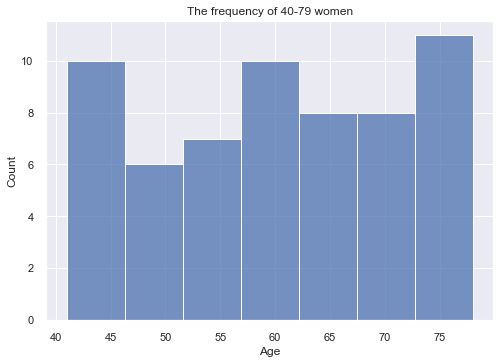

In [87]:
# Plotting the variable X
sns.histplot(data=df1['Age']).set(title="The frequency of 40-79 women")

> ### Conclusion: 
The given plot demonstrate the frequency of 15 randomly selected women. This group of age consists of 10-year groups, beginning with age 40 and ending with age 79. According to the plot,  when we divide these women into eight different group, we can notice a slightly unequal distribution between these groups. However, I would say that this plot still remains consistent with the random selection of women from each 10-year age group, as the difference is rather minor and acceptable 

### b. Obtain the residuals e_i and prepare a normal probability plot of the residuals. Does the distribution of the residuals appear to be symmetrical?

In [88]:
# excel the function to caculate the mean of X and Y
X_bar = np.mean(X)
Y_bar = np.mean(Y)
X_bar, Y_bar

(84.96666666666667, 59.983333333333334)

In [89]:
Y_err = Y - Y_bar 
X_err = X - X_bar
X_err.head()

0    21.033333
1    21.033333
2    12.033333
3    28.033333
4    11.033333
Name: Muscle Mass, dtype: float64

In [152]:
A = np.sum(X_err*Y_err)
B = np.sum(X_err**2)
b1 = A/B
b0 = Y_bar- b1*X_bar
b0,b1

(5.729869021754162, 0.6385264532551491)

In [91]:
Y_hat = b0 + b1*X
residual = Y - Y_hat

In [92]:
SSE = np.sum((Y_bar- Y_hat)**2)
MSE = SSE/ (len(Y)-2)
MSE

460.126582770074

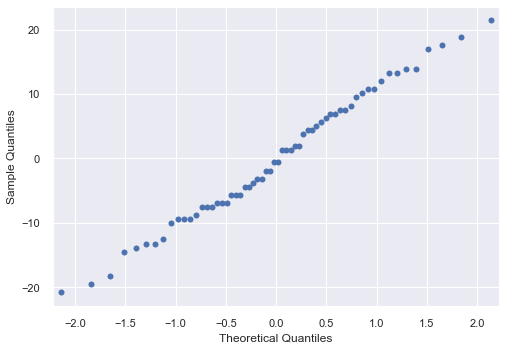

In [93]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(residual)
py.show()

> #### Conclusion: 
residuals are distributed symetrically for the symmetrical distribution in both X and Y axies. However, data points in the right top corner remains quite far from the other data points. Because of that, it is likely that these data points may be outliers

### c. Plot the residuals e_i against (Y_i ) ̂ and also against X_i on separate graphs to ascertain whether any departures from regression model (2.1) are evident. Do the two plots provide the same information? State your conclusions.

<AxesSubplot:>

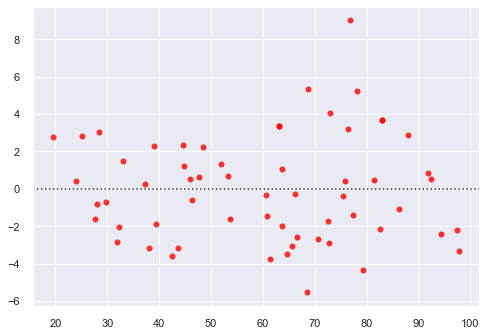

In [94]:
# plotting residuals against Y hat
sns.residplot(x=Y_hat, y= residual,data=df1,color='red')

<AxesSubplot:xlabel='Age'>

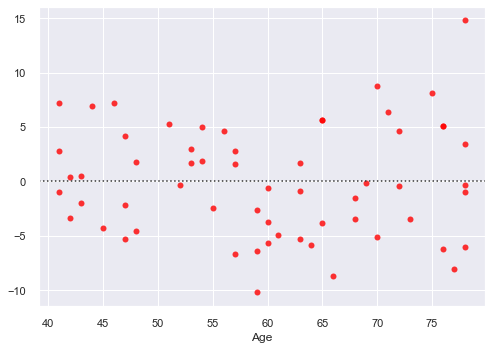

In [95]:
# plotting residuals against age
sns.residplot(x=df['Age'], y= residual,data=df1,color='red')

> #### Conclusion: 
These two plots give out the same information. However, there is an outlier in the left top corner in plot 1 and in the right top corner in plot 2

### d. Assume that (3.10) is applicable and conduct the Breusch-Pagan test to determine whether or not the error variance varies with the level of X. Use α = .01. State the alternatives, decision rule, and conclusion. Is your conclusion consistent with your preliminary findings in part (c)?

In [96]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
import statsmodels.stats.diagnostic as smd

In [97]:
#Breusch-Pagan test
# Fit the regression model
fit = smf.ols('X ~ Y', data=df).fit()
 
# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 4.42210593733162),
 ('p-value', 0.03547622638008991),
 ('f-value', 4.61482300995483),
 ('f p-value', 0.03588513598042569)]

In [98]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           4.12e-19
Time:                        10:25:06   Log-Likelihood:                -210.17
No. Observations:                  60   AIC:                             424.3
Df Residuals:                      58   BIC:                             428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    156.3466      5.512     28.363      0.0

>### Conclusion: 
 Before jumping straight into the conclusion, I would like to explain brieftly about the decision rule
 Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)
 If the p-value of the test is less than some significance level ( α = .01) then we don't accept the null hypothesis and conclude that heteroscedasticity is present in the regression model.
 From the table we can conclude that p-value= 0.03 > alpha= 0.01, so we accept the null hypothesis, and conclude that homoscedasticity is present = the residuals are distributed with equal variance
 Moreover, the plot that we make in part (C) also suggests the points are about the same distance from the line,which simply states that homoscedasiticity exists. So that, our conclusion is consistent with what we find out in part C

# Question 2:


In [99]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
import statsmodels.stats.api as sms
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import scipy.stats as stats
import seaborn as sns

In [102]:
df2 = pd.read_csv('CH03PR18.txt',sep= '\s+',header=None) # read the data set
df2.columns = (['Hours','Lotsize'])
df2.head() # return top 10 values

,Hours,Lotsize
0,14.28,15
1,8.80,9
2,12.49,7
3,9.38,4
4,10.89,9


In [106]:
X1= df2['Lotsize']
Y1=df2['Hours']

### a. Prepare a scatter plot of the data. Does a linear relation appear adequate here? Would a transformation on X or Y be more appropriate here? Why?

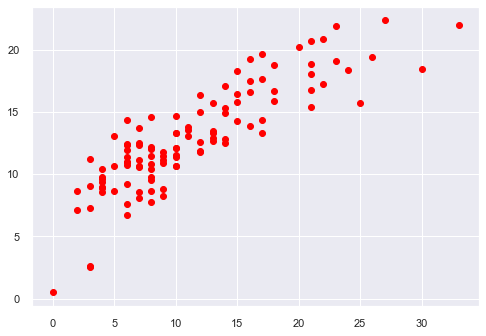

In [109]:
import matplotlib.pyplot as plt
plt.scatter(X1, Y1,color='red')
plt.show()

In [112]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           4.12e-19
Time:                        10:43:57   Log-Likelihood:                -210.17
No. Observations:                  60   AIC:                             424.3
Df Residuals:                      58   BIC:                             428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    156.3466      5.512     28.363      0.000     145.313     167.381
Y             -1.1900      0.090    -13.193      0.000      -1.371      -1.009
==============================================================================
Omnibus:                        1.213   Durbin-Watson:                   2.416
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.208
Skew:                           0.319   Prob(JB):                        0.547
Kurtosis:                       2.726   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### CONCLUSION: 
A scatterplot can identify several different types of relationships between two variables
  A relationship has no correlation when the points on a scatterplot do not show any pattern
  A relationship is non-linear when the points on a scatterplot follow a pattern but not a straight line.
  A relationship is linear when the points on a scatterplot follow a somewhat straight line pattern.
  A linear relation does not appear to be adequate here as the regression relation in the scatter-plot appears to be curvilinear. 
  Because visual examinations are largely subjective, we need a more precise and objective measure to define the correlation between the two variables. To quantify the strength and direction of the relationship between two variables, we use the linear correlation coefficient:
 Besides that, We can see from the summary, that the value of r= 0.746 ( which still runs from -1, and 1), and this encourages an moderate positive linear relationship of the two variables, however this is not adequate
The variability across different X levels appears to be fairly constant, thus a transformation to X is more suitable. 

 ### b. Use the transformation X^'=√X and obtain the estimated linear regression function for the transformed data.

In [120]:
fit.summary('X_new~ Y')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               X_new~ Y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           4.12e-19
Time:                        11:14:30   Log-Likelihood:                -210.17
No. Observations:                  60   AIC:                             424.3
Df Residuals:                      58   BIC:                             428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    156.3466      5.512     28.363      0.000     145.313     167.381
Y             -1.1900      0.090    -13.193      0.000      -1.371      -1.009
==============================================================================
Omnibus:                        1.213   Durbin-Watson:                   2.416
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.208
Skew:                           0.319   Prob(JB):                        0.547
Kurtosis:                       2.726   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Conclusion: 
  After the transformation of X, the value of R - squared = 0.750 is slightly higher than that of the orginal X= 0.746

### c. Plot the estimated regression line and the transformed data. Does the regression line appear to be a good fit for the transformed data?

In [159]:
# sample nmean
X_bar1 = np.mean(X1)
Y_bar1 = np.mean(Y1)
print('X_mean =',X_bar1)
print('Y_mean =',Y_bar1)

# difference from mean
X_err1 = X1 - X_bar1
Y_err1 = Y1 - Y_bar1

X_mean = 11.36936936936937
Y_mean = 12.926486486486487


In [160]:
A1 = np.sum(X_err1 * Y_err1)
B1 = np.sum(X_err1 ** 2)
print('A =',A1)
print('B =',B1)

A = 2608.7040540540543
B = 4891.855855855856


In [161]:
b1_1 = A1/B1
b0_1 = Y_bar1 - b1_1 * X_bar1
print('b1 =',b1_1)
print('b0 =',b0_1)

b1 = 0.5332749228355274
b0 = 6.863486913347429


In [176]:
Y_hat_new = b0 + b1*X_new
Y_hat1= b0 + b1*X1
residual_new= Y- Y_hat_new

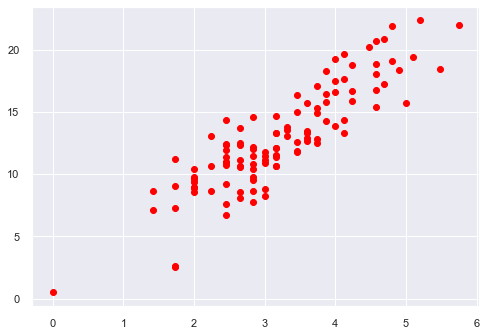

In [177]:
X_new=np.sqrt(X1)
import matplotlib.pyplot as plt
plt.scatter(X_new, Y1,color='red')
x = np.linspace(20, 120, 20)
sns.lineplot(X = X_new, Y = Y_hat_new, color='red')
plt.show()

> ### Conclusion: 
  The scatter-plot shows a reasonably linear relation, the estimated regression line appears to
be a good fit to the transformed data. 

### d. Obtain the residuals and plot them against the fitted values. Also prepare a normal probability plot. What do your plots show?

<AxesSubplot:xlabel='Lotsize'>

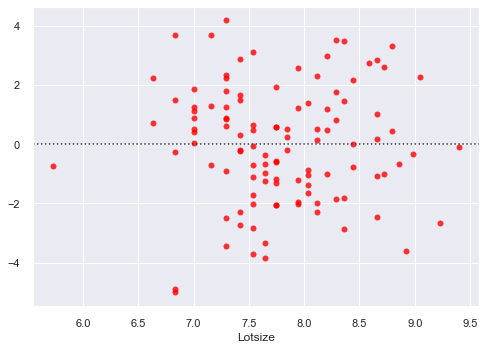

In [178]:
# plotting residuals against the fitted values
sns.residplot(x=Y_hat_new, y= residual_new,data=df1,color='red')

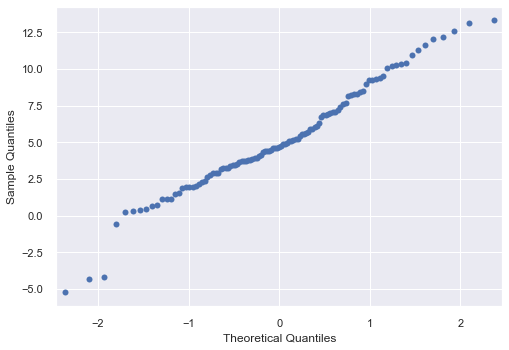

In [180]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(residual_new)
py.show()

> ### Conclusion
The normal probability plot shows that points fall reasonably close to a straight line, with very small tails deviating from the line, suggesting that the distribution of the error terms is
approximately normal. These two plots above show a good fit between model and data points. Q - Q plot show the distribution of the residuals appear to be symmetrical.

### e. Express the estimated regression function in the original units.

>The estimated regression line expressed in original units is Y = 6.863486913347429 + 0.5333 X